In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
#Give dataset path
train_path = '/kaggle/input/skin-cancer-malignant-vs-benign/train'
test_path = '/kaggle/input/skin-cancer-malignant-vs-benign/test'

Working with 1440 images
Image examples: 
764.jpg


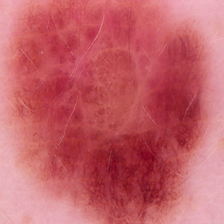

1700.jpg


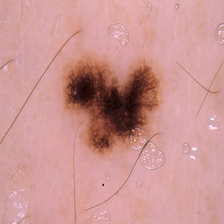

1786.jpg


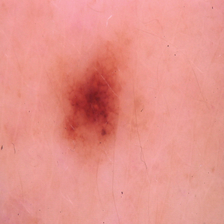

1075.jpg


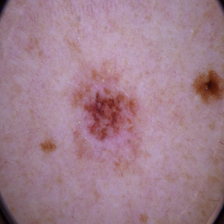

771.jpg


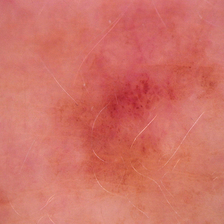

208.jpg


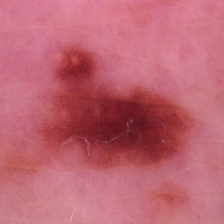

1789.jpg


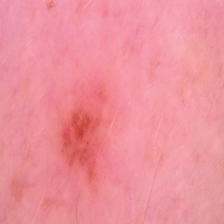

473.jpg


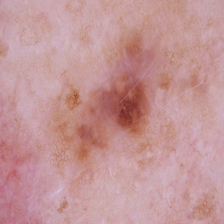

1792.jpg


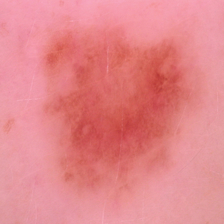

1411.jpg


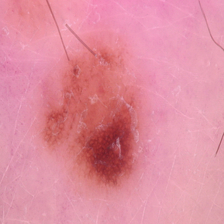

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [17]:
folders = glob('/kaggle/input/skin-cancer-malignant-vs-benign/train/*')
print(len(folders))

2


In [18]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [26]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [31]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/tmp/ipykernel_43/1357336239.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10

Epoch 1: val_loss improved from inf to 2.60037, saving model to mymodel.h5
5/5 - 248s - loss: 1.9120 - accuracy: 0.8125 - val_loss: 2.6004 - val_accuracy: 0.7545 - 248s/epoch - 50s/step


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
5/5 - 45s - loss: 2.0536 - accuracy: 0.7750 - 45s/epoch - 9s/step
Epoch 3/10
5/5 - 46s - loss: 2.2933 - accuracy: 0.8062 - 46s/epoch - 9s/step
Epoch 4/10
5/5 - 45s - loss: 2.0259 - accuracy: 0.8250 - 45s/epoch - 9s/step
Epoch 5/10
5/5 - 45s - loss: 2.6891 - accuracy: 0.7500 - 45s/epoch - 9s/step
Epoch 6/10
5/5 - 46s - loss: 1.5058 - accuracy: 0.8625 - 46s/epoch - 9s/step
Epoch 7/10
5/5 - 46s - loss: 2.2795 - accuracy: 0.7937 - 46s/epoch - 9s/step
Epoch 8/10
5/5 - 46s - loss: 1.5162 - accuracy: 0.8250 - 46s/epoch - 9s/step
Epoch 9/10
5/5 - 45s - loss: 1.7236 - accuracy: 0.7937 - 45s/epoch - 9s/step
Epoch 10/10
5/5 - 46s - loss: 1.2809 - accuracy: 0.8250 - 46s/epoch - 9s/step
Training completed in time:  0:16:03.397916


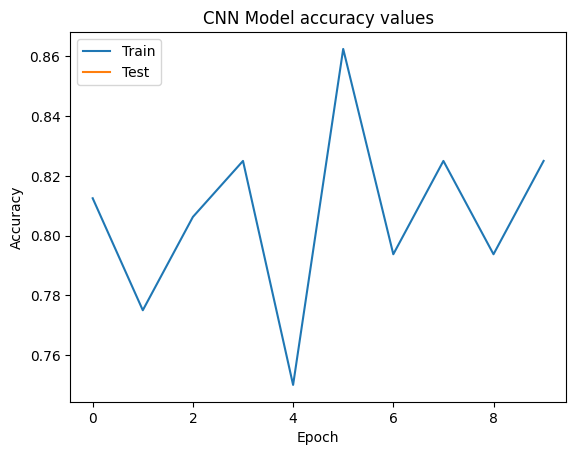

In [32]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
